In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=False, scaled=False)
data = diabetes.data
features_names = diabetes.feature_names

In [4]:
print(f'The dataset size and number of features is: {data.shape}')
print(f'The features found in the dataset are: {features_names}')

The dataset size and number of features is: (442, 10)
The features found in the dataset are: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
target = diabetes.target
target.shape

(442,)

# Pandas

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(data, columns=features_names)
df['target'] = target

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


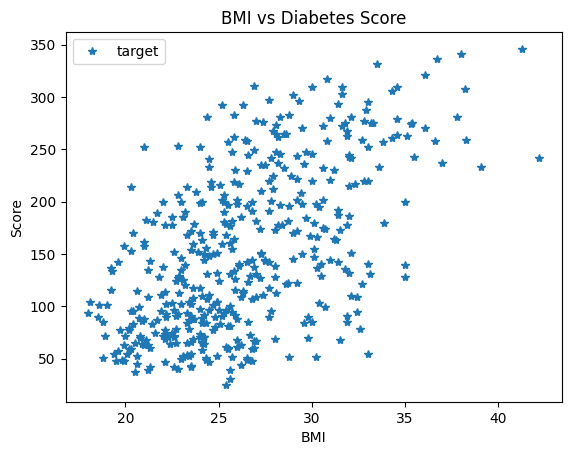

In [11]:
df.plot(x='bmi', y='target', style='*')
plt.title('BMI vs Diabetes Score')
plt.xlabel('BMI')
plt.ylabel('Score')
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

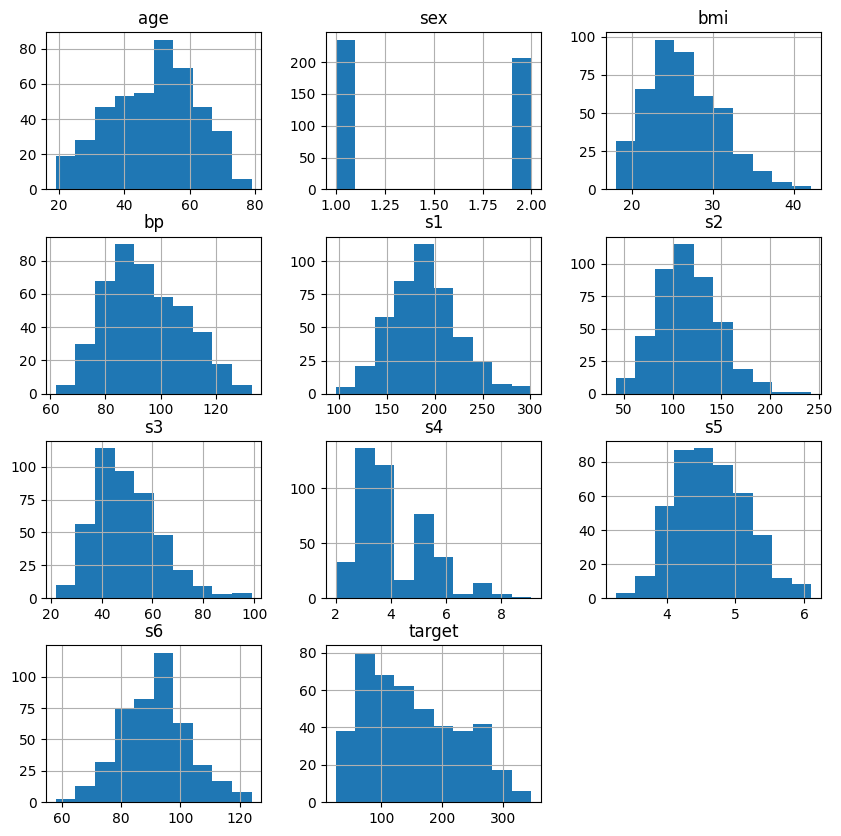

In [12]:
df.hist(figsize=(10,10))

# Data Preparation

In [13]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(442, 10) (442,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(f'Size of training set: {X_train.shape[0]}')
print(f'Size of test set: {X_test.shape[0]}')

Size of training set: 353
Size of test set: 89


# Data Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print(f'Linear Regression model coeficients: {model.coef_}')
print('\n')
print(f'Linear Regression model intercept: {model.intercept_}')

Linear Regression model coeficients: [ -1.721465   -11.5856942   27.51069174  14.3712086  -31.22139382
  15.26518393   1.16794747   8.18446857  35.83753415   2.12323129]


Linear Regression model intercept: 151.60623229461737


$$y = a_1x_1 + a_2x_2 + \cdots + a_nx_n + b$$

# Model Testing

In [22]:
y_pred = model.predict(X_test)
print(f'True sample #1: {y_test[0]}')
print(f'Predicted sample #1: {y_pred[0]}')

True sample #1: 321.0
Predicted sample #1: 238.46949509209452


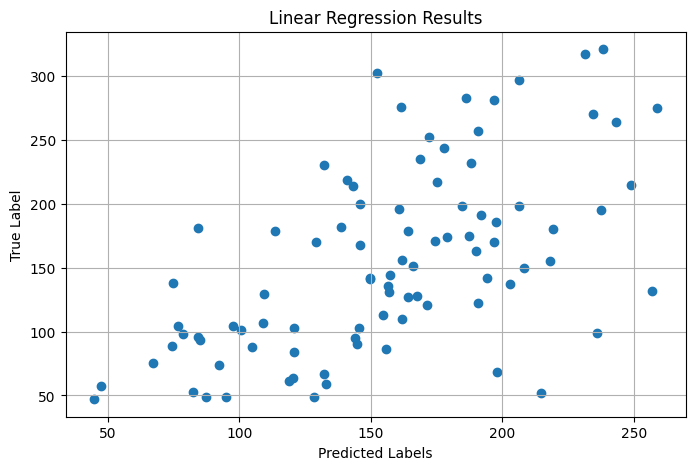

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Linear Regression Results')
plt.grid()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_mape = mean_absolute_percentage_error(y_test, y_pred)
model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
model_r2 = r2_score(y_test, y_pred)

print(f'{model} MAPE is {np.round(model_mape*100, 2)}%')
print(f'{model} RMSE is {np.round(model_rmse, 2)}')
print(f'{model} R2 is {np.round(model_r2*100, 2)}%')

LinearRegression() MAPE is 38.05%
LinearRegression() RMSE is 58.52
LinearRegression() R2 is 33.22%
